<a href="https://colab.research.google.com/github/Ashmitagurung/100daysofcode-Data_Science/blob/main/naive_baiye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data/Social_Network_ads.csv')

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
X = data[['Gender','Age','EstimatedSalary']]
y = data['Purchased']

In [ ]:
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(X['Gender'])

X['Gender']=le.transform(X['Gender'])

<ipython-input-8-8040557fdf12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender']=le.transform(X['Gender'])


In [ ]:
le.transform(['Male','Female','Male'])

array([1, 0, 1])

In [ ]:
le.inverse_transform([0,1,0,0,1])

array(['Female', 'Male', 'Female', 'Female', 'Male'], dtype=object)

In [ ]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
le.inverse_transform([0,1,0,0,1])

array(['Female', 'Male', 'Female', 'Female', 'Male'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>, <Axes: >]],
      dtype=object)

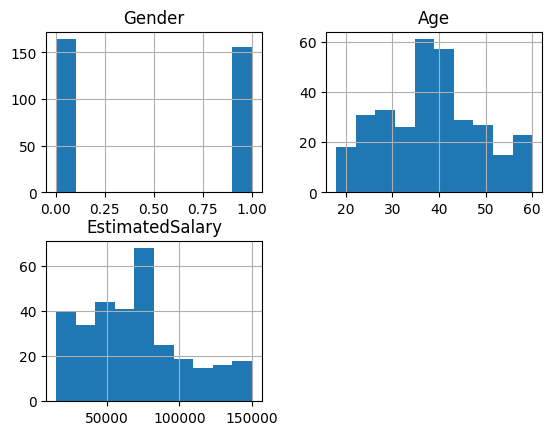

In [ ]:
X_train.hist()

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_scale = sc.transform(X_train)
X_test_scale = sc.transform(X_test)

In [ ]:
X_train_scale

array([[ 1.02532046e+00,  1.92295008e+00,  2.14601566e+00],
       [-9.75304830e-01,  2.02016082e+00,  3.78719297e-01],
       [-9.75304830e-01, -1.38221530e+00, -4.32498705e-01],
       [-9.75304830e-01, -1.18779381e+00, -1.01194013e+00],
       [-9.75304830e-01,  1.92295008e+00, -9.25023920e-01],
       [-9.75304830e-01,  3.67578135e-01,  2.91803083e-01],
       [-9.75304830e-01,  1.73156642e-01,  1.46942725e-01],
       [ 1.02532046e+00,  2.02016082e+00,  1.74040666e+00],
       [-9.75304830e-01,  7.56421121e-01, -8.38107706e-01],
       [-9.75304830e-01,  2.70367388e-01, -2.87638347e-01],
       [ 1.02532046e+00,  3.67578135e-01, -1.71750061e-01],
       [-9.75304830e-01, -1.18475597e-01,  2.20395980e+00],
       [-9.75304830e-01, -1.47942605e+00, -6.35303205e-01],
       [ 1.02532046e+00, -1.28500455e+00, -1.06988428e+00],
       [ 1.02532046e+00, -1.38221530e+00,  4.07691369e-01],
       [-9.75304830e-01, -1.09058306e+00,  7.55356227e-01],
       [ 1.02532046e+00, -1.47942605e+00

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

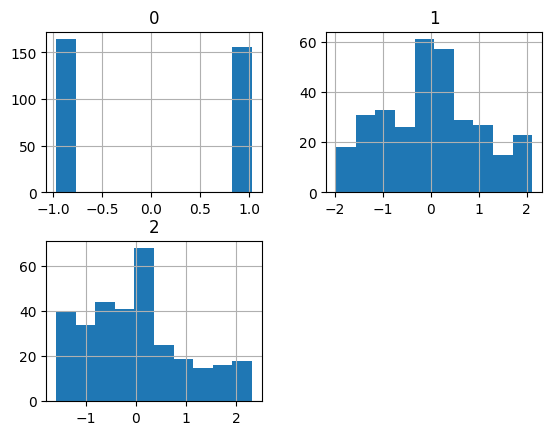

In [ ]:
pd.DataFrame(X_train_scale).hist()

In [ ]:
X_train_scale, y_train

(array([[ 1.02532046e+00,  1.92295008e+00,  2.14601566e+00],
        [-9.75304830e-01,  2.02016082e+00,  3.78719297e-01],
        [-9.75304830e-01, -1.38221530e+00, -4.32498705e-01],
        [-9.75304830e-01, -1.18779381e+00, -1.01194013e+00],
        [-9.75304830e-01,  1.92295008e+00, -9.25023920e-01],
        [-9.75304830e-01,  3.67578135e-01,  2.91803083e-01],
        [-9.75304830e-01,  1.73156642e-01,  1.46942725e-01],
        [ 1.02532046e+00,  2.02016082e+00,  1.74040666e+00],
        [-9.75304830e-01,  7.56421121e-01, -8.38107706e-01],
        [-9.75304830e-01,  2.70367388e-01, -2.87638347e-01],
        [ 1.02532046e+00,  3.67578135e-01, -1.71750061e-01],
        [-9.75304830e-01, -1.18475597e-01,  2.20395980e+00],
        [-9.75304830e-01, -1.47942605e+00, -6.35303205e-01],
        [ 1.02532046e+00, -1.28500455e+00, -1.06988428e+00],
        [ 1.02532046e+00, -1.38221530e+00,  4.07691369e-01],
        [-9.75304830e-01, -1.09058306e+00,  7.55356227e-01],
        [ 1.02532046e+00

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
print(classifier.score(X_train,y_train))
classifier.score(X_test,y_test)

0.884375


0.925

In [ ]:
classifier2 = GaussianNB()
classifier2.fit(X_train_scale, y_train)
print(classifier2.score(X_train_scale,y_train))
classifier2.score(X_test_scale,y_test)

0.88125


0.925

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y_train

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64

In [ ]:
ld=LogisticRegression()
ld.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print(ld.score(X_train,y_train))
ld.score(X_test,y_test)

0.621875


0.725

In [ ]:
gender=input("Enter your Gender (Male/Female):")
age=int(input("Enter your age"))
salary=float(input("Enter your salary:"))

gender_labelled=le.transform([gender])
input_scalled=sc.transform([[gender_labelled[0],age,salary]])

ans=classifier2.predict_proba(input_scalled)
ans2=classifier.predict_proba([[gender_labelled[0],age,salary]])
print(ans,ans2)

Enter your Gender (Male/Female):Male
Enter your age28
Enter your salary:45000
[[0.96926869 0.03073131]] [[0.96537353 0.03462647]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
print(ans.argmax(),ans.max())
print(ans2.argmax(),ans2.max())

0 0.9692686923745425
0 0.9653735266730128


In [ ]:
[gender_labelled[0],age,salary]

[1, 28, 45000.0]

In [ ]:
ld.predict([[gender_labelled[0],age,salary]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
ld.predict_proba([[gender_labelled[0],age,salary]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.51820344, 0.48179656]])

In [ ]:
data_text=pd.read_csv('/content/drive/MyDrive/data/email.csv')

In [ ]:
data_text

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
data_text=data_text.iloc[:-1,:]

In [ ]:
data_text

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
all_text=[]
for sent in data_text['Message']:
  for word in sent.split(' '):
    all_text.append(word)

In [ ]:
len(all_text)

87265

In [ ]:
all_text

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...',
 'Ok',
 'lar...',
 'Joking',
 'wif',
 'u',
 'oni...',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor...',
 'U',
 'c',
 'already',
 'then',
 'say...',
 'Nah',
 'I',
 "don't",
 'think',
 'he',
 'goes',
 'to',
 'usf,',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 "it's",
 'been',
 '3',
 "week's",
 'now',
 'and',
 'no',
 'word',
 'back!',
 "I'd",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send,',
 '£1.50',
 'to',
 'rcv',
 '

In [ ]:
data_text['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer

In [ ]:
c=CountVectorizer()
h=HashingVectorizer()

In [ ]:
data_c=c.fit_transform(data_text['Message'])
data_h=h.fit_transform(data_text['Message'])

In [ ]:
c.get_feature_names_out()[200:220]

array(['09058091870', '09058094454', '09058094455', '09058094507',
       '09058094565', '09058094583', '09058094594', '09058094597',
       '09058094599', '09058095107', '09058095201', '09058097189',
       '09058097218', '09058098002', '09058099801', '09061104276',
       '09061104283', '09061209465', '09061213237', '09061221061'],
      dtype=object)

In [ ]:
data_c.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_c.shape

(5572, 8709)

In [ ]:
data_h.shape

(5572, 1048576)

In [ ]:
len(set(all_text))

15688

In [ ]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB

In [ ]:
Bn=BernoulliNB()
Mn=MultinomialNB()

In [ ]:
le2= LabelEncoder()
le2.fit(data_text['Category'])
y=le2.transform(data_text['Category'])

In [ ]:
le2.inverse_transform([0,1])

array(['ham', 'spam'], dtype=object)

In [ ]:
Bn.fit(data_c,y)
Mn.fit(data_c,y)

MultinomialNB()

In [ ]:
Bn.score(data_c,y)

0.9877961234745154

In [ ]:
Mn.score(data_c,y)

0.9935391241923905

In [ ]:
text=input("Enter your email:")

Enter your email:free entry to fa cup


In [ ]:
ans_f=c.transform([text])

In [ ]:
Bn.predict(ans_f)

array([0])

In [ ]:
le2.inverse_transform(Bn.predict(ans_f))

array(['ham'], dtype=object)

In [ ]:
le2.inverse_transform(Mn.predict(ans_f))

array(['spam'], dtype=object)